<a href="https://colab.research.google.com/github/anishapoudel/linearRegression/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/DS3001/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 42 (delta 6), reused 2 (delta 2), pack-reused 31
Receiving objects: 100% (42/42), 2.49 MiB | 12.81 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
cd ..

/content/linearRegression


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [ ]:
#1
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()


Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

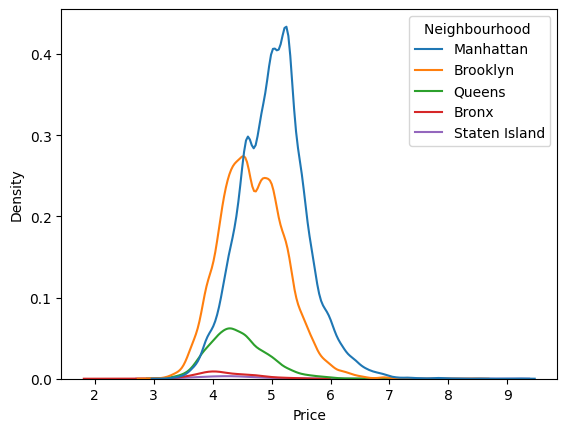

In [ ]:
sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()

1) Manhattan is by far the most expensive bourough on average.

In [ ]:
#2
price = df['Price']
nb = pd.get_dummies(df['Neighbourhood '], dtype='int')
from sklearn import linear_model
regression = linear_model.LinearRegression(fit_intercept=False).fit(nb,price) # Run regression
final = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_}) # Regression coefficients
final


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


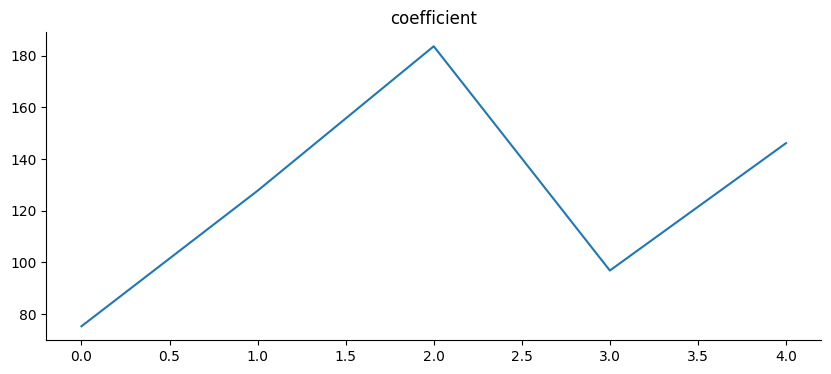

In [ ]:
# @title coefficient

from matplotlib import pyplot as plt
final['coefficient'].plot(kind='line', figsize=(10, 4), title='coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

2) Since there are no other control variables, the regression is only computing the group averages. The coefficeents of the regression on the neighbourhood dummy is the same as the groupwise means.

In [ ]:
#3
nb = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)
price = df['Price']

from sklearn import linear_model
regression = linear_model.LinearRegression().fit(nb,price)

final = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_})
final

print(regression.intercept_)
final = pd.DataFrame({'variable':regression.feature_names_in_,
                        'coefficient': regression.coef_+regression.intercept_})
final

75.27649769585331


,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


3) The Bronx is dropped. This becomes the reference category where its coeddicent from the prior regression is the new value of the intercept.The coefficents for this new regression are all relative to the Bronx.

In [ ]:
#4
from sklearn import linear_model
from sklearn.model_selection import train_test_split

nb = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
price = df['Price']
xt, xtest, yt, ytest = train_test_split(nb,price, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes


ztest = pd.concat([xtest['Review Scores Rating'],
                    pd.get_dummies(xtest['Neighbourhood '], dtype='int')], axis = 1)
zt = pd.concat([xt['Review Scores Rating'],
                     pd.get_dummies(xt['Neighbourhood '], dtype='int')], axis = 1)

regress = linear_model.LinearRegression(fit_intercept=False).fit(zt,yt) # Run regression

yh = regress.predict(ztest)
rmse = np.sqrt( np.mean( (ytest - yh)**2 ))
print('Rsq: ', regress.score(ztest,ytest)) # R2
print('RMSE: ', rmse) # R2

final = pd.DataFrame({'variable':regress.feature_names_in_, 'coefficient': regress.coef_}) # Regression coefficients
final

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


4)
Rsq:  0.06701086106947296
RMSE:  125.01092061382933
Most expensive property for rent: 100-rated place in Manhattan- ~192.64/night

In [ ]:
#5
nb = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
price = df['Price']
xt, xtest, yt, ytest = train_test_split(nb,price, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes
ztest = pd.concat([xtest['Review Scores Rating'],
                    pd.get_dummies(xtest['Neighbourhood '], dtype='int'),
                    pd.get_dummies(xtest['Room Type'], dtype='int')],
                    axis = 1)
zt = pd.concat([xt['Review Scores Rating'],
                    pd.get_dummies(xt['Neighbourhood '], dtype='int'),
                    pd.get_dummies(xt['Room Type'], dtype='int')],
                    axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(zt,yt) # Run regression
y_hat = reg.predict(ztest)
rmse = np.sqrt( np.mean( (ytest - y_hat)**2 ))
print('Rsq: ', reg.score(ztest,ytest)) # R2
print('RMSE: ', rmse) # R2
final = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
final

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


5)
Rsq:  0.22035348129282306
RMSE:  114.27692123130633
Most expensive property to rent: 100 rated entire home/apt in Manhattan


6)
There was a coefficent chnage from part 4 (1.03) to part 5 (0.63). One difference is that part 4 did not include info about the room while part 5 did. This has an effect in prices by rating and neighborhood. Once the room tye is controlled, the other variables are less powerful predictors, which is why the coefficient shrinks.